<a href="https://colab.research.google.com/github/ArtfulMonster/Machine-Learning/blob/main/HW_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1a

100%|██████████| 170498071/170498071 [00:03<00:00, 48929831.50it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch [1/300], Loss: 1.9226
Epoch [2/300], Loss: 2.0954
Epoch [3/300], Loss: 1.8232
Epoch [4/300], Loss: 1.9149
Epoch [5/300], Loss: 1.7237
Epoch [6/300], Loss: 1.6608
Epoch [7/300], Loss: 1.6947
Epoch [8/300], Loss: 1.5366
Epoch [9/300], Loss: 1.7537
Epoch [10/300], Loss: 1.5303
Epoch [11/300], Loss: 1.6777
Epoch [12/300], Loss: 1.6167
Epoch [13/300], Loss: 1.6552
Epoch [14/300], Loss: 1.6243
Epoch [15/300], Loss: 1.5861
Epoch [16/300], Loss: 1.5393
Epoch [17/300], Loss: 1.5268
Epoch [18/300], Loss: 1.5408
Epoch [19/300], Loss: 1.6673
Epoch [20/300], Loss: 1.5320
Epoch [21/300], Loss: 1.5526
Epoch [22/300], Loss: 1.5131
Epoch [23/300], Loss: 1.5753
Epoch [24/300], Loss: 1.7128
Epoch [25/300], Loss: 1.4690
Epoch [26/300], Loss: 1.5690
Epoch [27/300], Loss: 1.5870
Epoch [28/300], Loss: 1.5484
Epoch [29/300], Loss: 1.4639
Epoch [30/300], Loss: 1.6471
Epoch [31/300], Loss: 1.5776
Epoch [32/300], Loss: 1.5106
Epoch [33/300], Loss: 1.6484
Epoch [34/300], Loss: 1.5242
Epoch [35/300], Loss: 1

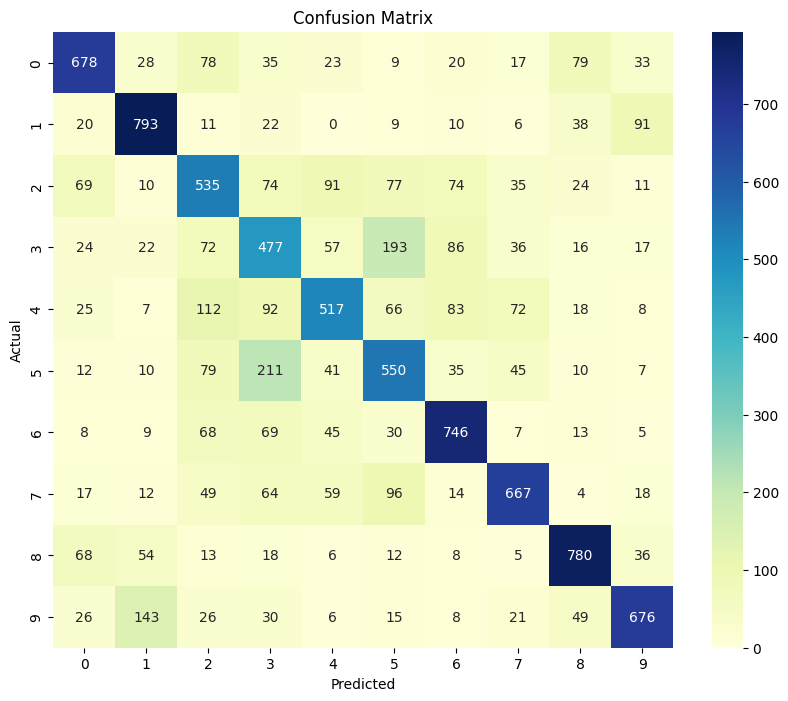

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
import torch
from torchvision import transforms
from torch.utils.data import Dataset
from torchvision.io import read_image
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define the transformation for the images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to mean=0.5 and std=0.5 for each channel
])

# Download and load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define the data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Define the CNN model
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(32 * 16 * 16, 512),  # Assuming input image size is 32x32
    nn.Tanh(),
    nn.Linear(512, 10),  # 10 output classes for CIFAR-10
    nn.Softmax(dim=1)
)

# Instantiate the model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing loop
model.eval()
all_predicted = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(all_labels, all_predicted)
precision = precision_score(all_labels, all_predicted, average='weighted')
recall = recall_score(all_labels, all_predicted, average='weighted')
f1 = f1_score(all_labels, all_predicted, average='weighted')

# Print the metrics
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Create the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predicted)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Problem 1b

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
import torch
from torchvision import transforms
from torch.utils.data import Dataset
from torchvision.io import read_image
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the transformation for the images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to mean=0.5 and std=0.5 for each channel
])

# Download and load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define the data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Define the extended CNN model
class ExtendedCNN(nn.Module):
    def __init__(self):
        super(ExtendedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 8 * 8, 512)  # Adjusted input size based on the output size of the second convolution
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(512, 10)  # 10 output classes for CIFAR-10
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Instantiate the extended model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
extended_model = ExtendedCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(extended_model.parameters(), lr=0.001)

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    extended_model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = extended_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the extended model
extended_model.eval()
all_predicted = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = extended_model(inputs)
        _, predicted = torch.max(outputs, 1)

        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(all_labels, all_predicted)
precision = precision_score(all_labels, all_predicted, average='weighted')
recall = recall_score(all_labels, all_predicted, average='weighted')
f1 = f1_score(all_labels, all_predicted, average='weighted')

# Print the metrics
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Create the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predicted)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Problem 2a

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


class ResNetBlock2D(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super(ResNetBlock2D, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.downsample(identity)
        out = self.relu(out)
        return out

class ResNet10_2D(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet10_2D, self).__init__()
        self.in_channels = 3
        self.conv1 = nn.Conv2d(self.in_channels, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.create_layer(ResNetBlock2D, 16, 16, 3, stride=1)
        self.layer2 = self.create_layer(ResNetBlock2D, 16, 32, 3, stride=2)
        self.layer3 = self.create_layer(ResNetBlock2D, 32, 64, 3, stride=2)
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(64, num_classes)

    def create_layer(self, block, in_channels, out_channels, num_blocks, stride):
        layers = []
        layers.append(block(in_channels, out_channels, stride))
        for _ in range(1, num_blocks):
            layers.append(block(out_channels, out_channels, 1))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Function to train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=300):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    criterion = criterion.to(device)
    optimizer = optimizer

    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Function to evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    all_predicted = []
    all_labels = []
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_predicted.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predicted)
    precision = precision_score(all_labels, all_predicted, average='weighted')
    recall = recall_score(all_labels, all_predicted, average='weighted')
    f1 = f1_score(all_labels, all_predicted, average='weighted')

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

# Download and load the CIFAR-10 dataset with the specified transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)  # Add transform argument here

# Define the data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Instantiate the model, loss function, and optimizer
model = ResNet10_2D(num_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs=300)

# Evaluate the model
evaluate_model(model, test_loader)
